In [48]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [49]:
df = np.loadtxt('Triangle/log_a_15_p_50_r_4.csv',delimiter=',')

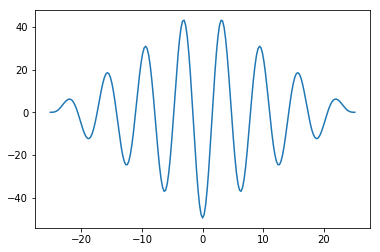

In [50]:
plt.plot(np.linspace(-8*np.pi,8*np.pi,199),np.correlate(np.sin(np.linspace(0,8*np.pi,100)),np.sin(np.linspace(0,8*np.pi,100)+np.pi),mode=2))

0.0


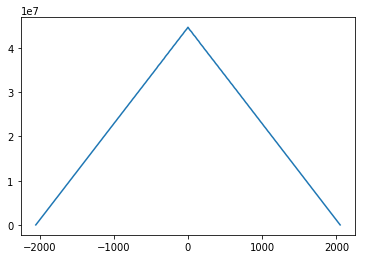

In [51]:
df = np.loadtxt('Triangle/log_a_15_p_50_r_4.csv',delimiter=',')
heading = df[:,1]
position = df[:,2]
corr = np.correlate(heading,position,mode=2)
size = heading.shape[0]
lag = np.linspace(-size,size,2*size-1)
plt.plot(lag,corr)
print(lag[corr.argmax()])

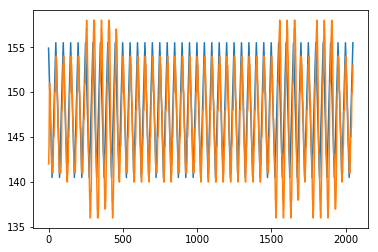

In [52]:
plt.plot(heading)
plt.plot(position)

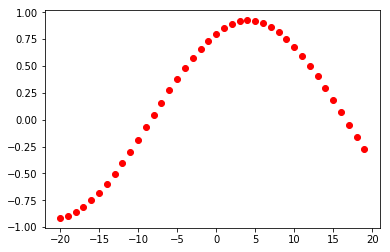

In [53]:
for i in range(-20,20):
    if i>0:
        plt.plot(i,np.corrcoef(heading[:-i],position[i:])[1,0],'ro')
    elif i<0:
        plt.plot(i,np.corrcoef(heading[-i:],position[:i])[1,0],'ro')
    else:
        plt.plot(i,np.corrcoef(heading,position)[1,0],'ro')

In [62]:
def determineLag(file,maxFrames=50):
    df = np.loadtxt(file,delimiter=',')
    time = df[:,0]
    heading = df[:,1]    
    position = df[:,2]
    frame_interval_mean = np.diff(time).mean()
    frame_interval_std = np.diff(time).std()
    lags = np.arange(-maxFrames,maxFrames)
    corrs = np.zeros(lags.shape)
    for n,i in enumerate(lags):
        if i>0:
            corrs[n] = np.corrcoef(heading[:-i],position[i:])[1,0]
        elif i<0:
            corrs[n] = np.corrcoef(heading[-i:],position[:i])[1,0]
        else:
            corrs[n] = np.corrcoef(heading,position)[1,0]
    plt.plot(lags,corrs)
    max_corr_index = np.argmax(corrs)
    max_corr_value = corrs[max_corr_index]
    max_corr_frame = lags[max_corr_index]
    return max_corr_frame, max_corr_value, max_corr_frame*frame_interval_mean, max_corr_frame*frame_interval_std

(18, 0.9899476642056756, 0.35352920736451515, 0.033200069409465516)

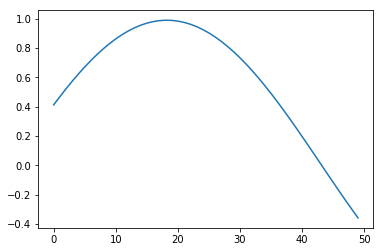

In [64]:
determineLag('Triangle/log_a_120_p_100_r_0.csv')

In [200]:
def determineLag_forward(file,maxFrames=100):
    df = np.loadtxt(file,delimiter=',')
    time = df[:,0]
    heading = df[:,1]    
    position = df[:,2]
    frame_interval_mean = np.diff(time).mean()
    frame_interval_std = np.diff(time).std()
    lags = []
    corrs = []
    i = 1
    old_corr = -1
    start_corr = np.corrcoef(heading,position)[1,0]
    continues = True
    while continues:
        corr = np.corrcoef(heading[:-i],position[i:])[1,0]
        lags.append(i)
        corrs.append(corr)
        max_corr=np.max(corrs)
        i+=1
        if old_corr>corr and corr>start_corr:
            continues=False
        old_corr= corr

    #plt.figure(figsize=(5,5))
    #plt.plot(lags,corrs)
    lags= np.array(lags)
    corrs= np.array(corrs)
    max_corr_index = np.argmax(corrs)
    max_corr_value = corrs[max_corr_index]
    max_corr_frame = float(lags[max_corr_index])
    return max_corr_frame, max_corr_value, max_corr_frame*frame_interval_mean, max_corr_frame*frame_interval_std,frame_interval_mean

In [201]:
import os
import pandas as pd

In [202]:
import seaborn as sns

In [213]:
files = os.listdir('Triangle/')

In [218]:
data = pd.DataFrame(columns=['a','p','r','frame_lag', 'max_corr', 'timelag_mean', 'timelag_sd',"frame_int"])
for n,f in enumerate(files):
    _,_,a,_,p,_,r = f.split("_")
    r = r.split('.')[0]
    frame_lag, max_corr, timelag_mean, timelag_sd,frame_int = determineLag_forward('Triangle/'+f,int(2*np.pi/float(p)/8))
    data.loc[n] = [float(a),float(p),float(r),frame_lag, max_corr, timelag_mean, timelag_sd,frame_int]

In [219]:
data.head()

,a,p,r,frame_lag,max_corr,timelag_mean,timelag_sd,frame_int
0,120.0,100.0,0.0,18.0,0.989948,0.353529,0.033200,0.019641
1,120.0,100.0,1.0,19.0,0.979262,0.375105,0.031092,0.019742
2,120.0,100.0,2.0,13.0,0.946389,0.257898,0.025388,0.019838
3,120.0,100.0,3.0,12.0,0.948661,0.238285,0.026937,0.019857
4,120.0,100.0,4.0,9.0,0.887189,0.171048,0.031137,0.019005


In [220]:
data.groupby(['a','p']).mean()

r  frame_lag  max_corr  timelag_mean  timelag_sd  frame_int
a     p                                                                   
15.0  20.0   2.0        5.0  0.482453      0.098536    0.009510   0.019707
      50.0   2.0        3.4  0.935375      0.067116    0.006797   0.019762
      100.0  2.0        3.0  0.981689      0.058084    0.006983   0.019361
      200.0  2.0        3.2  0.991019      0.062645    0.006211   0.019583
      500.0  2.0        3.0  0.997753      0.059564    0.006133   0.019855
30.0  20.0   2.0        9.0  0.133824      0.174233    0.021158   0.019359
      50.0   2.0       10.2  0.666556      0.199208    0.020919   0.019531
      100.0  2.0        3.4  0.980001      0.067133    0.006957   0.019745
      200.0  2.0        3.0  0.994053      0.058158    0.007112   0.019386
      500.0  2.0        3.4  0.998709      0.066418    0.006871   0.019537
60.0  20.0   2.0       10.2  0.167711      0.202051    0.019396   0.019807
      50.0   2.0       13.8  0.651186      0.268656    0.030607   0.019514
      100.0  2.0        6.4  0.948037      0.125026    0.013538   0.019537
      200.0  2.0        3.2  0.990483      0.062733    0.006204   0.019609
      500.0  2.0        3.2  0.999352      0.062951    0.007172   0.019657
120.0 20.0   2.0       11.0  0.126216      0.215077    0.023538   0.019552
      50.0   2.0       22.0  0.645901      0.429612    0.045430   0.019528
      100.0  2.0       14.2  0.950290      0.279173    0.029551   0.019617
      200.0  2.0        5.0  0.990222      0.097779    0.010964   0.019560
      500.0  2.0        3.2  0.997467      0.062503    0.006848   0.019535
240.0 20.0   2.0       11.0  0.083888      0.214489    0.023314   0.019499
      50.0   2.0       24.0  0.742739      0.470809    0.048436   0.019617
      100.0  2.0       36.0  0.961345      0.702855    0.077225   0.019524
      200.0  2.0       10.4  0.978790      0.201369    0.024137   0.019382
      500.0  2.0        5.4  0.988880      0.107020    0.011774   0.019770

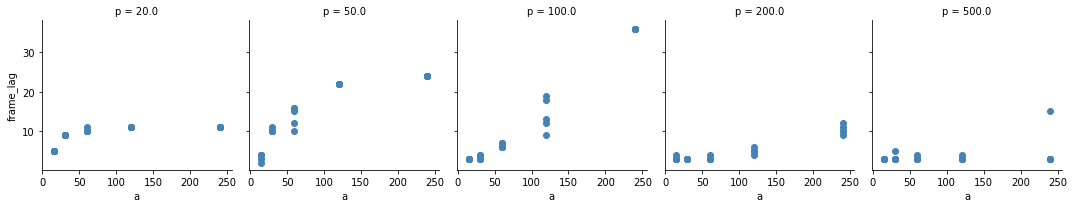

In [221]:
g = sns.FacetGrid(data, col="p", margin_titles=True)
g.map(plt.scatter,'a', "frame_lag", color="steelblue")

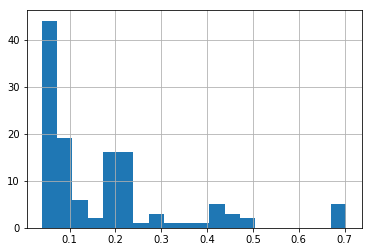

In [222]:
data.timelag_mean.hist(bins=20)

In [198]:
data.timelag_mean.mean()

0.4653362040475394

In [212]:
1/data.frame_int.mean()

63.617009099431264

In [224]:
data_filtered = data[data.max_corr>0.75]
data_filtered.groupby(['a','p']).mean()

r  frame_lag  max_corr  timelag_mean  timelag_sd  frame_int
a     p                                                                   
15.0  50.0   2.0        3.4  0.935375      0.067116    0.006797   0.019762
      100.0  2.0        3.0  0.981689      0.058084    0.006983   0.019361
      200.0  2.0        3.2  0.991019      0.062645    0.006211   0.019583
      500.0  2.0        3.0  0.997753      0.059564    0.006133   0.019855
30.0  100.0  2.0        3.4  0.980001      0.067133    0.006957   0.019745
      200.0  2.0        3.0  0.994053      0.058158    0.007112   0.019386
      500.0  2.0        3.4  0.998709      0.066418    0.006871   0.019537
60.0  100.0  2.0        6.4  0.948037      0.125026    0.013538   0.019537
      200.0  2.0        3.2  0.990483      0.062733    0.006204   0.019609
      500.0  2.0        3.2  0.999352      0.062951    0.007172   0.019657
120.0 100.0  2.0       14.2  0.950290      0.279173    0.029551   0.019617
      200.0  2.0        5.0  0.990222      0.097779    0.010964   0.019560
      500.0  2.0        3.2  0.997467      0.062503    0.006848   0.019535
240.0 50.0   1.5       24.0  0.894532      0.471023    0.045735   0.019626
      100.0  2.0       36.0  0.961345      0.702855    0.077225   0.019524
      200.0  2.0       10.4  0.978790      0.201369    0.024137   0.019382
      500.0  2.0        5.4  0.988880      0.107020    0.011774   0.019770

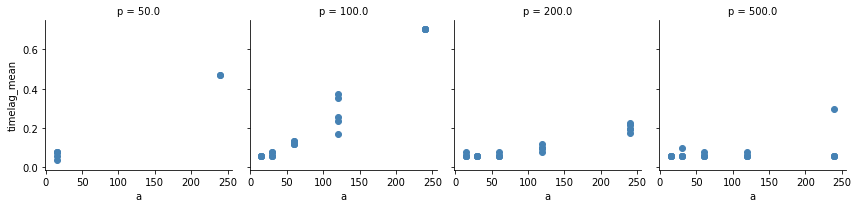

In [226]:
g = sns.FacetGrid(data_filtered, col="p", margin_titles=True)
g.map(plt.scatter,'a', "timelag_mean", color="steelblue")

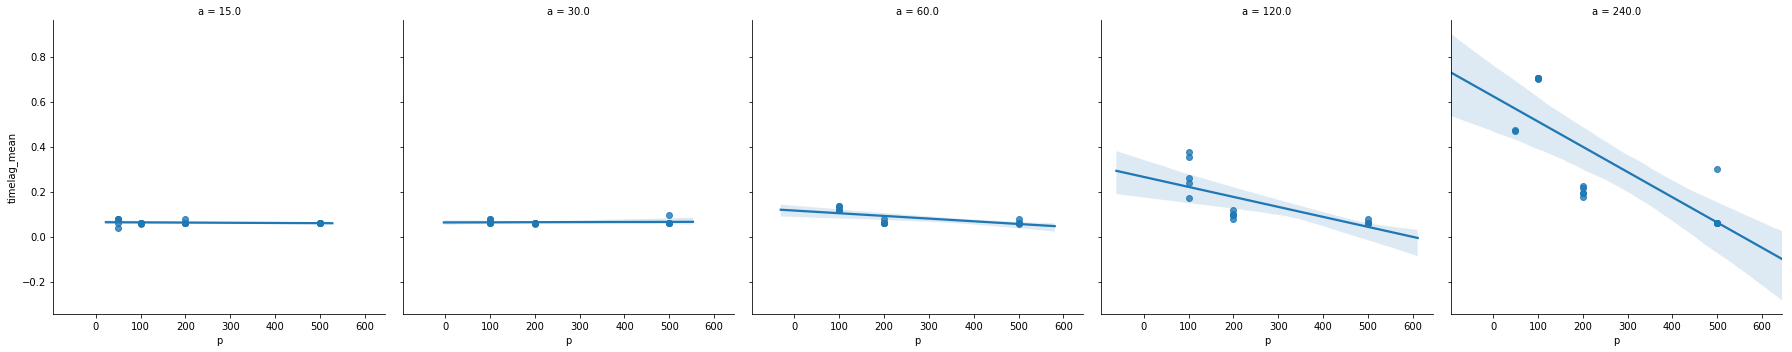

In [237]:
sns.lmplot("p","timelag_mean",data_filtered,col='a')